In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
#from scipy import stats
from IPython.display import Image

In [2]:
# set seabron style and matplotlib parameters for very nice plotting
sns.set_style('whitegrid')
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.title_fontsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['figure.figsize'] = [10,6]

# Linear Regression—the Bayesian Way
This notebook covers linear regression with a Bayesian approach (MCMC with PyMC). Also similarities and differences to the frequentist approach are briefly discussed.

## <font color=#495F75>Linear regression model</font>

Linear regression models capture the relationship between one or more indpendent variables $X_1,X_2,\dots,X_k$ on a dependent variable $Y$, with the typical equation:

$$
Y=b_0+b_1X_1+b_2X_2+\dots+b_kX_k=\sum^k_{i=0} b_iX_i 
$$

Hence, the expected value of an observation is the linear combination of the weighted predictors. This equations does not differ between the frequentist and the Bayesian approach. The important difference is that the result of a frequentist linear regression is a point estimates for each of the parameters $b_0,b_1,\dots,b_k$ and with a Bayesian approach we get a probability distribution (i.e. the posterior distribution). Also the Bayesian approach forces us to define our prior knowledge about the parameters through the prior distributions (the frequentist approach always uses a uniform distribution—exeption: ridge regression).

## <font color=#495F75>Sample data</font>
As sample data we use an example from Rudolf und Buse (2020). This allows us to compare our results with the frequentist approach. 

The data covers motivation at workplace of 25 employees:

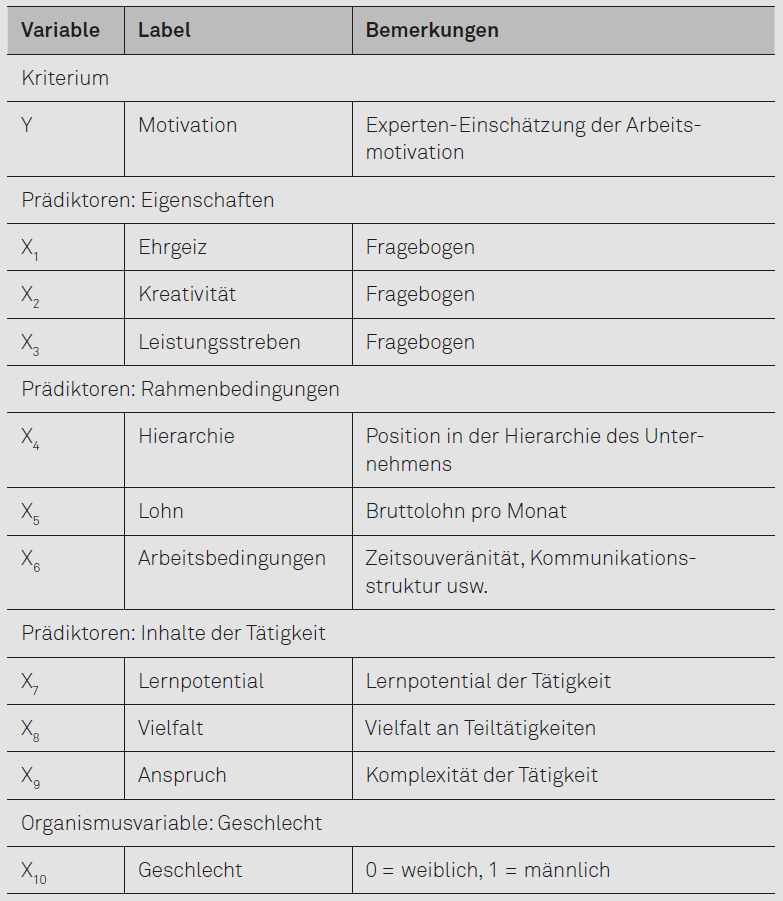

In [3]:
Image('graphics/datenbeschreibung.png', width=500)

### Import data
You can save nearly everything (yes, also inference data objects) with the <b>Pickle</b> package. Look here at the end of the document how it works: https://docs.python.org/3/library/pickle.html. Here we load a happy Panda with the required data:

In [3]:
with open('Arbeitsmotivation.pkl', 'rb') as f: # rb: read, byte mode
    dfData = pickle.load(f)

dfData.head(5) # print the first five rows of the df

,Pb,Motivation,Ehrgeiz,Kreativität,Leistungsstreben,Hierarchie,Lohn,Arbeitsbedingungen,Lernpotential,Vielfalt,Anspruch,Geschlecht
0,1.0,32.0,36.0,30.0,20.0,20.0,3100.0,34.0,29.0,69.0,66.0,männlich
1,2.0,14.0,30.0,11.0,30.0,7.0,2600.0,39.0,16.0,47.0,36.0,männlich
2,3.0,12.0,19.0,15.0,15.0,8.0,3200.0,42.0,13.0,32.0,17.0,weiblich
3,4.0,27.0,42.0,16.0,39.0,13.0,2500.0,43.0,15.0,63.0,49.0,weiblich
4,5.0,20.0,14.0,22.0,5.0,22.0,3700.0,42.0,29.0,38.0,62.0,männlich


<u>Recap:</u> You can access columns directly with the respective name with <code>df.column</code> or <code>df['column']</code> (returns a Pandas data series object).

In [4]:
dfData['Ehrgeiz']

0     36.0
1     30.0
2     19.0
3     42.0
4     14.0
5     12.0
6     17.0
7      4.0
8     32.0
9     15.0
10    38.0
11    24.0
12    28.0
13    36.0
14    18.0
15    40.0
16    30.0
17    27.0
18    18.0
19    32.0
20    33.0
21    33.0
22    27.0
23    30.0
24    37.0
Name: Ehrgeiz, dtype: float64

## <font color=#495F75>Simple linear Regression</font>
We can start with the simplest case—linear regression with one independent variable $X$. So we can define our Bayesian model this way:

$$
\mu=b_0+b_1X \\
Y\sim\mathcal N(\mu,\sigma)
$$

Understanding this model definition is important. Here we say our data (i.e. each data point) follows a normal distribution and the mean (of each data point) is defined by the linear regression model. The model can be visualized like this:

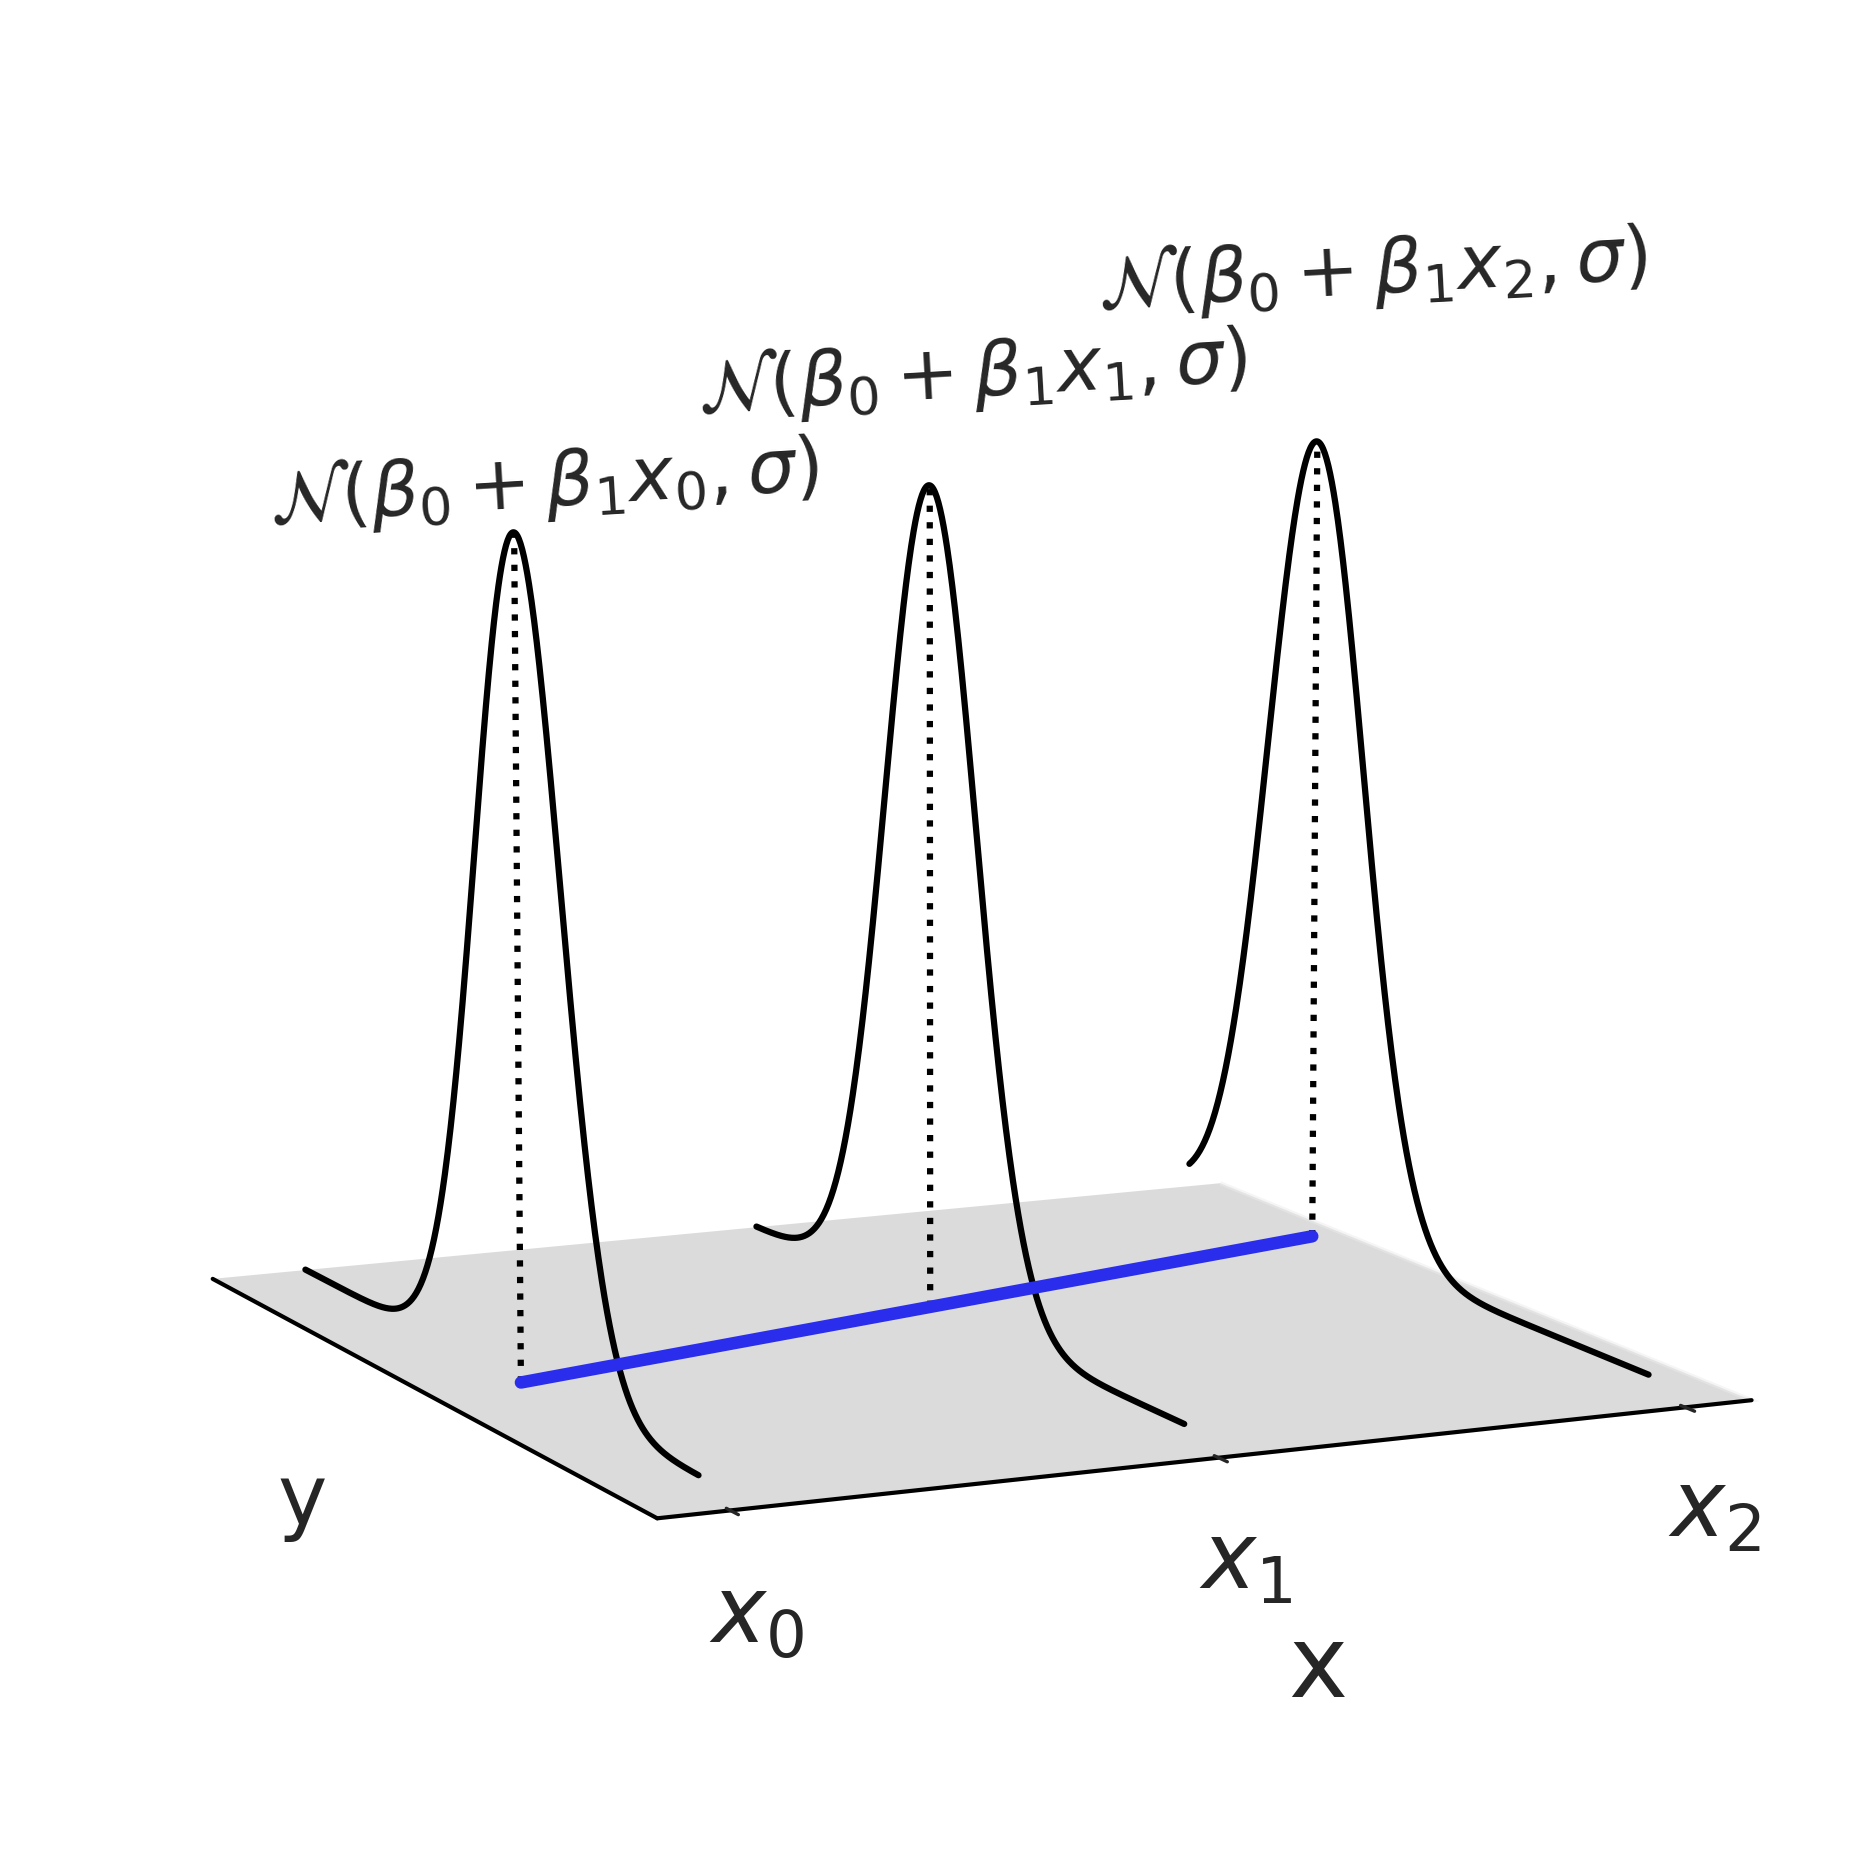

In [5]:
Image('graphics/3d_linear_regression.png', width=500)

### Descriptive Statistics
We use <i>Leistungsstreben</i> as our first independent variable and want to predict <i>Motivation</i>. We can start by plotting the relationship between <i>Leistungsstreben</i> and our dependent variable <i>Motivation</i>. As we have a Pandas DataFrame we can use <i>Seaborn</i> for plotting. <i>Seaborn</i> is specialized in plotting data from Pandas and you can use the names of the columns (these are also automatically used for axes labels). With <code>sns.lmplot()</code> you can directly create a scatter plot with a linear regression line:

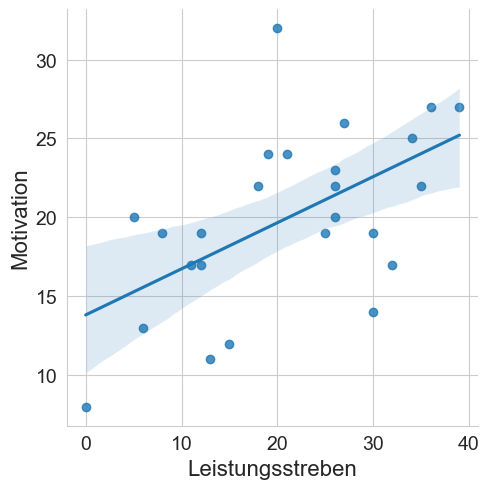

In [6]:
sns.lmplot(data=dfData, x='Leistungsstreben', y='Motivation');

### <font color=#D28140><u>Exercises:</u></font>
- Create the graphical model of the whole Bayesian linear regression model with one predictor.
- Implement the model with PyMC. You can define deterministic variables with: <code>pm.Deterministic('name', equation)</code>. You can use the information from the scatterplot for your prior definitions.
- You can check your model definition with prior predictive checks (PPC) for $Y$.
- Sample the posterior, have a look at the results with <code>az.summary()</code>, plot posterior distributions for $b_0$, $b_1$ and $e$, and perform PPC.
- Use different priors and check how these influence the posterior.

$\to$ Kimberly Fessel has some nice <i>Seaborn</i> tutorials on youtube https://www.youtube.com/playlist?list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j

### Model Definition and Inference

In [8]:
with pm.Model() as simpleLinReg:


In [ ]:
priorPredictive

### Diagnostics and Results

### Posterior predictive checks (PPC)
We can sample some data from our inferred posterior and plot these data together with our observed data. We should get points in the same <i>Motivation</i> range (depending on <i>Leistungsstreben</i>):

In [15]:
PPC = pm.sample_posterior_predictive(inferenceData, model=simpleLinReg)

Sampling: [Y]


In [ ]:
plt.figure()
plt.hist(dfData.Motivation, density=True, bins=10, label='empirical Data')
plt.hist(PPC.posterior_predictive['Y'].to_numpy().flatten(), density=True, alpha=.6, bins=10, label='PPC')
plt.legend()
plt.show()

### Plot Regression Line
The diagnostics and the posterior distributions look okay and are in an expected range. The 95% HDI of $b_1$ excludes 0, so we can conclude that <i>Leistungsstreben</i> has a significant influence on <i>Motivation</i>. We can also plot the corresponding regression line: 

In [ ]:
b0Post = inferenceData.posterior['b0'].mean().to_numpy() # get the mean of the posterior for b0
b1Post = inferenceData.posterior['b1'].mean().to_numpy() # get the mean of the posterior for b1

xMin = dfData.Leistungsstreben.min() # get minimum and maximum of the data for x-range definition
xMax = dfData.Leistungsstreben.max()
yRegLine = b0Post+b1Post*np.arange(xMin,xMax,0.1) # data for regression line

# plot it
plt.figure()
plt.plot(np.arange(xMin,xMax,0.1), yRegLine, label=f'y = {b0Post.round(2)}+{b1Post.round(2)}x', color='orange') # inferred regression line
sns.scatterplot(data=dfData, x='Leistungsstreben', y='Motivation', label='emprirical data') # observed data
plt.legend(fontsize=16)
plt.show()

The resulting regression line is nearly identical with the result from the frequentist approach based on OLS:

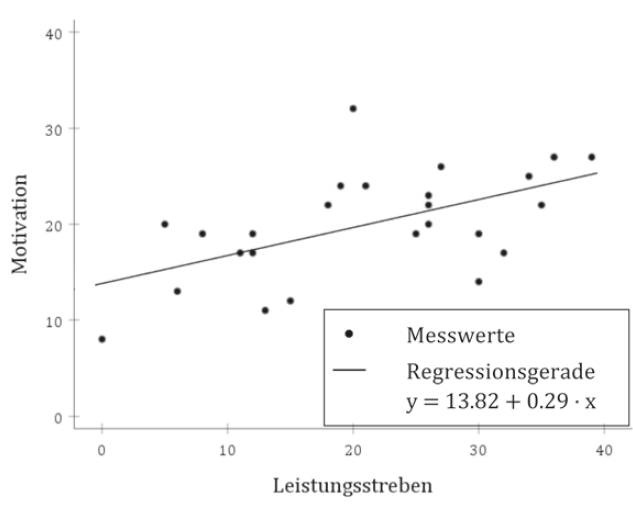

In [18]:
Image('graphics/erg_elg.png', width=500)

The advantage of the Bayesian approach is our posterior distribution that tells us the uncertainty. Hence, we can also plot the range where we expect the true regression line with 95%. 

In [ ]:
YhatHDI = az.hdi(inferenceData.posterior['Yhat'], hdi_prob=.95) # get the 95% HDI for each data point
YhatHDI = YhatHDI.Yhat.to_numpy() # convert to 2D NumPy array

LSsort = dfData.Leistungsstreben[np.argsort(dfData.Leistungsstreben)] # sort Leistungsstreben
LShdi = YhatHDI[LSsort.index] # get the 95% HDI for all (sorted) data points

# plot it
plt.figure()
plt.plot(np.arange(xMin,xMax,0.1), yRegLine, label=f'y = {b0Post.round(2)}+{b1Post.round(2)}x', color='orange') # inferred regression line
plt.fill_between(LSsort, LShdi[:,0], LShdi[:,1], alpha=.6, color='#E6CDAE', label='95% HDI') # plot 95% HDI
sns.scatterplot(data=dfData, x='Leistungsstreben', y='Motivation', label='emprirical data') # observed data
plt.legend()
plt.show()

### Using a categorical Predictor

### <font color=#D28140><u>Exercises:</u></font>
- How would you implement the linear regression model with the categorical variable <i>Geschlecht</i> as predictor?
- Implement it and sample the posterior.
- How would you interprete $b_0$ and $b_1$?

In [ ]:
with pm.Model() as simpleLinRegCat:


## <font color=#495F75>Multiple linear regression (with two independent variables)</font>
Now we can extend our model with one more predictor—<i>Ehrgeiz</i>. This is super easy—we just add another parameter $b_2$ and extend our likelihood:

In [ ]:
with pm.Model() as multipleLinReg:
    b0 = pm.Normal('b0', mu=0, sigma=20)
    b1 = pm.Normal('b1', mu=0, sigma=1)
    b2 = pm.Normal('b2', mu=0, sigma=1) # the new paremeter for Ehrgeiz
    e = pm.Gamma('e', alpha=2, beta=1)

    Yhat = pm.Deterministic('Yhat', b0+b1*dfData['Leistungsstreben']+b2*dfData['Ehrgeiz'])

    Y = pm.Normal('Y', mu=Yhat, sigma=e, observed=dfData['Motivation'])

    inferenceDataMLR = pm.sample(idata_kwargs={'log_likelihood':True}) #step=pm.Metropolis())

In [ ]:
az.summary(inferenceDataMLR, var_names=['b0', 'b1', 'b2', 'e'], hdi_prob=.95)

In [ ]:
az.plot_posterior(inferenceDataMLR, var_names=['b0','b1','b2','e']);

### <font color=#D28140><u>Exercises:</u></font>
- Perform PPC.
- The coefficient for <i>Leistungsstreben</i> was significant in our first regression model, but it is not significant anymore. Why? Verify your guess! (Hint: correlation)
- Use the Metropolis-Hastings sampler for this model with <code>pm.sample(step=pm.Metropolis())</code>. What happens?
- Transform the coefficients into standardized $\beta$. Use <code>df.columnname.std(ddof=0)</code> for SD and <code>iData.posterior['bi'].mean()</code> for the posterior mean. The corresponding equation is: 
$$
\beta=b\frac{s_x}{s_y}
$$



##### PPC

##### Transform $b$ to $\beta$

## Model "Fit"
We can investigate which model "fits" our data better. A first hint is the value of $e$ that decreases when we add the second predictor. But if we would add more and more predictors we could end up with a perfect fit (i.e. $e=0$). This sounds good, but it can lead to <b>overfitting</b>, where also noise is fitted and the results are not generalizable. Hence, most measures of predictive accuracy try to prevent overfitting by penalizing for the number of predictors. So, we want a balance between model fit and model complexity.

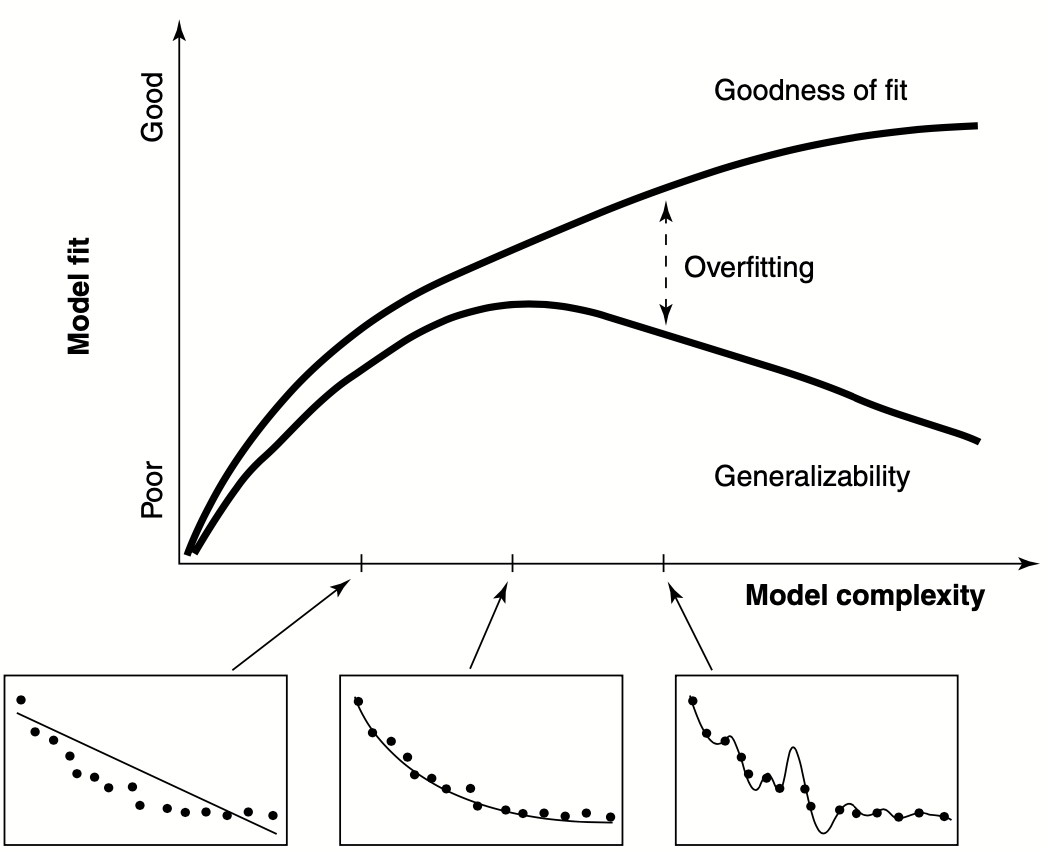

In [41]:
Image('graphics/model_fit_complexity.png', width=600)

We can use <i>ArviZ</i> to calculate the predictive accuracy of our models. ArviZ delivers a function to calculate the <b>Pareto-smoothed importance sampling leave-one-out cross-validation (PSIS-LOO-CV)</b> (Vehtari, Gelman, & Gabry, 2017), which penalizes for number of parameters.

This function needs <b>log probabilities</b> for our posterior samples, but these are not part of our inference data object. So we have to rerun the inference, but this time add the argument <code>idata_kwargs={'log_likelihood':True}</code> to <code>pm.sample()</code>. Then we can use <code>az.loo(iData, scale='deviance')</code>. The LOO-value indicates the deviance between model and the data, thus the lower the LOO the smaller the difference and the better the predictive accuracy.

### <font color=#D28140><u>Exercises:</u></font>
- Rerun inference for the models with <i>Leistungsstreben</i>, and <i>Leistungsstreben</i> and <i>Ehrgeiz</i> as predictors and save log probabilities.
- Calculate and compare LOO for both models.
- Perform model comparison with <code>az.compare()</code> and <code>az.plot_compare</code>.

## <font color=#495F75>Multiple linear regression (with many independent variables)</font>
Next we can use a model with all independent variables—in our case 9. It would be super annoying to add 7 new parameters. A better solution would be to use the <code>shape=n</code> argument for parameters of PyMC, thus we have one parameter with several values (i.e. an array or vector)—e.g. <code>pm.Distribution('name', parameters, shape=n)</code>.  For the likelihood function we now need matrix multiplication (i.e. this is equivalent to the design matrix approach from SPM):

$$ Y=\boldsymbol{bX}=\sum b_iX_i $$


### <font color=#D28140><u>Exercises:</u></font>
- Create the graphical model for this case (i.e. vector of $b$ and likelihood with matrix multiplication).
- Implement the model and use all predictors, except <i>Geschlecht</i>. Use <code>pm.math.dot(a, b)</code> for matrix multiplication, <code>df.loc[:, 'Ehrgeiz':'Anspruch']</code> to select the specific columns, <code>df.transpose()</code> for transposing, and don't forget to add the constant with <code>df.insert(column ID, 'name', values)</code>!
- Perform PPC (and convergence checks, if you want).
- What is a potential disadvantage of this specific implementation? How could you fix it?

### Model implementation

In [ ]:
# add constant


In [ ]:
with pm.Model() as multipleLinRegAllPred:


You can compare your results with the frequentist approach:

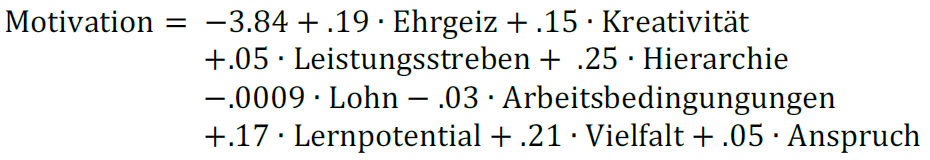

In [50]:
Image('graphics/erg_mlg.png', width=500)

##### PPC

### Any more?
- Martin, Kumar, & Lao (2022) chapter 4.3: modeling of interaction effects

### References
Martin, O. A., Kumar, R., & Lao, J. (2021). <i>Bayesian Modeling and Computation in Python</i>. CRC Press.

Pitt, M. A., & Myung, I. J. (2002). When a good fit can be bad. <i>Trends in cognitive sciences, 6</i>(10), 421-425.

Vehtari, A., Gelman, A., & Gabry, J. (2017). Practical Bayesian model evaluation using leave-one-out cross-validation and WAIC. <i>Statistics and computing, 27</i>, 1413-1432.

In [61]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Tue Jun 11 2024

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.20.0

pymc      : 5.6.1
matplotlib: 3.8.4
arviz     : 0.17.1
pandas    : 2.2.1
seaborn   : 0.12.2
numpy     : 1.25.2
scipy     : 1.12.0

Watermark: 2.3.1

